# Amazon Food Reviews Sentiment Analysis

In [1]:
pwd

'/Users/user/Desktop'

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Project Overview

Sentimental analysis is area of research for the social media and reviews. It can deliver the different services like marekting data, how to improve product or service, about medicine and also many other services. It is very interesting to work with sentimental analysis because we have to interact with the human languages (words/reviews/comments) and identify subjective informations.

Few algorithms like Naive Bayes and SVM are commonly used for snetimental analysis. Also, RNN (Recurrent Neural Network), Deep Learning and Machine Learning has started to perform all other functions because of its ability to predict the meaning of sentence based on sentence structure. 

For this project, I have performed sentiment analysis on the Amazon Food Review dataset.

# Problem Statement
Here I need to predict the positive or negative target reviews for each data row. The goal will be to maximize the accuracy of this classification. We will train our model on a dataset containing thousands of reviews presented as unstructured text. Each review will be labeled as positive or negative.

To solve this problem we will perform the following tasks:

Preprocess the data.
Train and tune the hyperparameters of the recurrent neural network.
Test the accuracy of the model on the testing set.

# Importing the data set

In [3]:
df = pd.read_csv("FoodReview.csv")

Data Type Count

In [4]:
df.get_dtype_counts()

int64     5
object    5
dtype: int64

What are the fields provided in the Amazon fine food reviews dataset?

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time,Summary,Text
0,492346,B001VNP0Y6,AEZRVY3CV52UZ,"Corey Wright ""Democratus""",3,3,5,1320537600,Just what I needed,I got them in a very timely manner and they're...
1,343811,B008J1HO4C,A18VZYSLOUO060,"D. Simpson ""Frugal SOB""",2,2,5,1204329600,Most excellent oatmeal,McCann's Steel Cut Oatmeal is the perfect brea...
2,347257,B000FFIL60,A28Y1M7GRG0I9M,"Real Comments ""Lin""",0,0,4,1318464000,Quality Tea,I would recommend it. Quality pearls and a few...
3,225529,B002ZX1U9A,A245HC4T5J97WG,Logan DeAngelis,0,0,5,1306540800,Great Coffee at a Great price,"I have to admit, I first purchased these Hazel..."
4,485488,B001RVFERK,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...


Here, data contains the column "TEXT" for the specific user to represent the review of that product having unique productId. Also, unique productId can help to find the product from the list on Amazon and can find all the reviews related to that product and can review the product. The UserId is used to get the user information who have logged in to review the food product. Two columns HelpfulnessNumerator and HelpfullnessDenominator are helpful to provide the review information based on the summary. The column Prediction shows the review based on scale fof 5. Time column provide the information about the review posted time by the user on Amazon. Summary can help to get idea about positive or negative review for the product.

More importantly, for each review, we have a “Prediction” variable representing a rating from 1 to 5 (1 is a poor review, and 5 is an excellent review).



# Removing Null data

In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Prediction                 0
Time                       0
Summary                   21
Text                       0
dtype: int64

In [7]:
df.dropna(subset=['ProfileName'], inplace=True)

In [8]:
df.dropna(subset=['Summary'], inplace=True)

In [9]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Prediction                0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time
count,454723.000000,454723.000000,454723.000000,454723.000000,4.547230e+05
mean,284326.575368,1.757736,2.242508,4.183114,1.296251e+09
std,164028.607930,7.904016,8.545508,1.310205,4.802309e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142435.500000,0.000000,0.000000,4.000000,1.271376e+09
50%,284376.000000,0.000000,1.000000,5.000000,1.311034e+09
75%,426256.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568453.000000,866.000000,923.000000,5.000000,1.351210e+09


### Checking for Unique values

In [61]:
Nunique = df.nunique()
Nunique = Nunique.sort_values()
Nunique

Sentiment                      2
Usefulness                     2
Prediction                     5
HelpfulnessNumerator         221
HelpfulnessDenominator       225
Time                        3112
ProductId                  67726
ProfileName               189020
Summary_Clean             213284
UserId                    219794
Summary                   247756
Text                      325823
Id                        454723
dtype: int64

We can see that, dataframe contains around 67726 different products and around 219794 
users have reviewd the food products which helps to get the different reviews around 454723 for the food. 

### Non Zero Prediction Values

How many reviews are included in this dataset?

In [12]:
print("non-zero values for Prediction")
print(sum(df['Prediction']>0))

non-zero values for Prediction
454723


The dataset contains 568,454 food reviews Amazon users.

### Correlation btween the columns of data set

How will you find the relations between the columns in dataframes?

In [13]:
correlations = [[(index1, index2) for index2, column in row.iteritems() if column>0.6 and index1 != index2] 
 for index1, row in df.corr().iterrows()]
print("List of highly correlated variables:")
print()
for correlation in correlations:
    for item in correlation:
        print(item[0]," and ",item[1])

List of highly correlated variables:

HelpfulnessNumerator  and  HelpfulnessDenominator
HelpfulnessDenominator  and  HelpfulnessNumerator


Above result shows that HelpfullnessNumerator and HelpfullnessDenominator are very 
close to each other and cor-related to each other. 

### Correlation via Heat-Map

Can we check the correlation between all the columns?

                        HelpfulnessNumerator  HelpfulnessDenominator  \
HelpfulnessNumerator                1.000000                0.976387   
HelpfulnessDenominator              0.976387                1.000000   
Prediction                         -0.032307               -0.095452   
Time                               -0.150231               -0.168216   

                        Prediction      Time  
HelpfulnessNumerator     -0.032307 -0.150231  
HelpfulnessDenominator   -0.095452 -0.168216  
Prediction                1.000000 -0.063888  
Time                     -0.063888  1.000000  


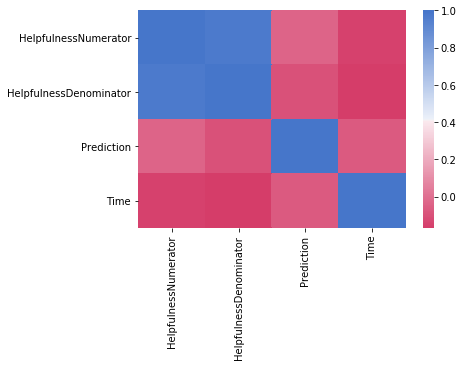

In [14]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Prediction', 'Time']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

Above figure shows the relation between all the numerical columns that are related to each other and how much they are related to others. We can figure out that column having value near to 1.o is most correlated to that other column.

### Displaying Usefulness of the review

Can we get idea about the usefulness of the reviews from dataset?

In [15]:
df["Sentiment"] = df["Prediction"].apply(lambda score: "positive" if score > 3 else "negative")
df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "useless")

df.head(50)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time,Summary,Text,Sentiment,Usefulness
0,492346,B001VNP0Y6,AEZRVY3CV52UZ,"Corey Wright ""Democratus""",3,3,5,1320537600,Just what I needed,I got them in a very timely manner and they're...,positive,useful
1,343811,B008J1HO4C,A18VZYSLOUO060,"D. Simpson ""Frugal SOB""",2,2,5,1204329600,Most excellent oatmeal,McCann's Steel Cut Oatmeal is the perfect brea...,positive,useful
2,347257,B000FFIL60,A28Y1M7GRG0I9M,"Real Comments ""Lin""",0,0,4,1318464000,Quality Tea,I would recommend it. Quality pearls and a few...,positive,useless
3,225529,B002ZX1U9A,A245HC4T5J97WG,Logan DeAngelis,0,0,5,1306540800,Great Coffee at a Great price,"I have to admit, I first purchased these Hazel...",positive,useless
4,485488,B001RVFERK,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...,positive,useless
5,74981,B0026RQTGE,A161Y9NAR43WCW,vertov,0,0,5,1314835200,Our dog has fresh breath,No doggie breath for our dog. People are alwa...,positive,useless
6,204180,B000F0FZE6,A1H35JZ9UUCVIF,carrera4,1,1,5,1330646400,Great Pasta & Healthy!,I tried this pasta after viewing the Dr. Oz sh...,positive,useful
7,454372,B0019K981W,A13H71301WENPW,"Patricia Fentriss ""PF""",11,13,1,1249344000,Sugar bomb!!! Same amount of sugar as a 12 oz...,Check out the sugar content before you buy! 2...,negative,useful
8,112235,B0009JJB4S,A2HBOYLMGW2A5Y,lee,0,0,5,1345852800,Pretty great for the price!,"I drink Iron goddess oolong pretty often, it i...",positive,useless
9,295251,B000LQNK50,ATO0RF3HWQ3WW,"Scott ""Scottso""",12,16,3,1236729600,Its OK,Maybe it's due to my tendency to prefer noodle...,negative,useless


### Splitting dataframe into train and test data

How will you do sentimental analysis on the datasets? How will you start implementations?

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df["Summary_Clean"] = df["Summary"].apply(cleanup)

train, test = train_test_split(df, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

363778 items in training data, 90945 in test data


We can start implementation by creating Test and Train data. Here, 363778 data rows are in training data and 90945 data rows are in Test data. Now we can implement the diff analysis using this Train and Test data.

# Sentiment scores

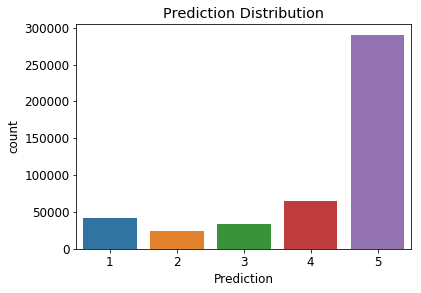

In [70]:
ax = plt.axes()
sns.countplot(df.Prediction,ax=ax)
ax.set_title('Prediction Distribution')
plt.show()

In [73]:
print("Average Score: ",np.mean(df.Prediction))
print("Median Score: ",np.median(df.Prediction))

Average Score:  4.183113675798233
Median Score:  5.0


As we can observe, the majority of Scores are equal to 4 and 5, and with an average score of 4.18. Because of the distribution is very skewed to the left, we will make a binary prediction. We can consider a negative review will have a Score between 1 and 3, and a positive review will have a Score equal to 4 or 5.

# Score prediction
Logistic regression model on word count

In [17]:
from wordcloud import WordCloud, STOPWORDS

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

In [75]:
cdf = df[df['Prediction'] != 3]
X = cdf['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = cdf['Prediction'].map(y_dict)

c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 104489
# train records: 315454
# test records: 105152
Model Accuracy: 0.9383844339622641

-Top 20 positive-
Coefficient           Word
   2.866823        chedder
   2.682058     pleasantly
   2.655859         bertie
   2.448787         porous
   2.436518         skewed
   2.423942        easiest
   2.405478       downside
   2.358084    beetlejuice
   2.330106      skeptical
   2.292455        solving
   2.262341       terrific
   2.231851        biscoff
   2.226543        ruffles
   2.195592      addicting
   2.189176         hooked
   2.183176  inconvenience
   2.181415       updating
   2.178819       heartier
   2.128550       obsessed
   2.121666         hahaha

-Top 20 negative-
Coefficient            Word
  -2.366501       sleepless
  -2.413647           snail
  -2.425885      repackaged
  -2.427711          jammed
  -2.453388     unappealing
  -2.505021       disturbed
  -2.534557  disappointment
  -2.570223         3095826
  -2.613330       cancelled
  -2.668301   

# Logistic regression model on TFIDF

Can we capture the list of the words for Positive reviews and Negative reviews from the dataset?

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 104489
# train records: 315454
# test records: 105152
Model Accuracy: 0.9335628423615338

-Top 20 positive-
Coefficient       Word
  13.506856      great
  11.590151  delicious
  11.437148       best
  10.259248    perfect
   9.489034  excellent
   9.375249      loves
   8.705795     highly
   8.579428       love
   8.193503  wonderful
   7.402186    amazing
   7.273709       good
   7.216878    awesome
   6.806781   favorite
   6.658609       nice
   6.454763       glad
   6.418996     hooked
   6.415605      yummy
   6.405190     smooth
   6.312973    pleased
   5.949468      thank

-Top 20 negative-
Coefficient            Word
  -5.505024          hoping
  -5.720401           hopes
  -5.745208     undrinkable
  -5.805598           stale
  -6.007149       tasteless
  -6.041809            yuck
  -6.126152      disgusting
  -6.230636           worse
  -6.299422           bland
  -6.582159           threw
  -6.597748          return
  -6.760740            weak
  -7.177206   

From above logic, you can see that we have captured the 20 positive words used in dataset reviews and 20 negative words used in dataset review. Based on this words, we can predict the food reviews and based on that we can suggest the good and bad food from the productId of the Amazon food.

In [82]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.ix[under_sample_indices, :]
X_u = under_sample_data['Text']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  24112


/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


After calculating the ratio between the frequency count in the positive review divided by the frequency count in the negative review for each word, here are the results:

When the ratio is high (greater than 1), it means than the words tend to occur more often in positive reviews than in negative reviews.

Can we filter the special characters from the text column?

In [84]:
from string import punctuation

under_sample_data['word_count'] = under_sample_data['Text'].apply(lambda x: len(x.split()))
under_sample_data['capital_count'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c.isupper()))
under_sample_data['question_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '?'))
under_sample_data['exclamation_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '!'))
under_sample_data['punctuation'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c in punctuation))

print(under_sample_data.groupby('% Upvote').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}).T)

X_num = under_sample_data[under_sample_data.columns.difference(['% Upvote', 'Text'])]
y_num = under_sample_data['% Upvote']

% Upvote                  0          1
word_count        86.065362  92.669708
capital_count     17.734323  14.804827
question_mark      0.231337   0.104098
exclamation_mark   0.702804   0.797196
punctuation       20.639267  20.693597


In [86]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

## Accuracy is lower than context features we tried above, meaning the feature is not good enough to predict our target

Logistic Regression accuracy: 0.5645321831453218
SVM accuracy: 0.6255806237558063


In [79]:
cdf = df[df['Prediction'] == 5]
cdf = df[df['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
cdf.shape

X = cdf['Text']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = cdf['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1    178603
0     12056
Name: % Upvote, dtype: int64


Based on the prediction value for each data, we can make a decision about the positive and negative reviews. Data with the prediction value less than 3 will be considered as a negative review and data with the greater than 3 will be considered as positive review. Based on this consideration, we will decide the product of amazon food.

## Removing Stopwords and displaying appropriate good word reviews

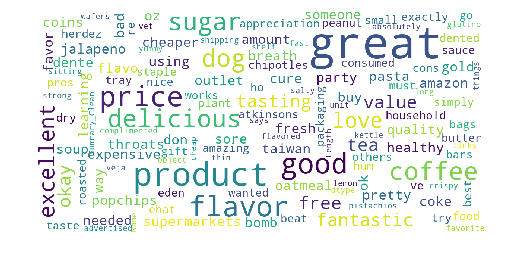

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["Summary_Clean"])

In the word cloud above, some words that stand out are "highly", "addictive", "soothing", and "enjoy," which have a positive meaning. Certain ingredients or products are also highlighted like "chili", "magnesium", "almonds," etc. These word are neutral, but probably appear often in positive reviews as a result of Amazon's inventory; Amazon likely selects to distribute products, like almonds or chili, that meet or surpass users' expectations.


### Displaying reviews of words with low scoring

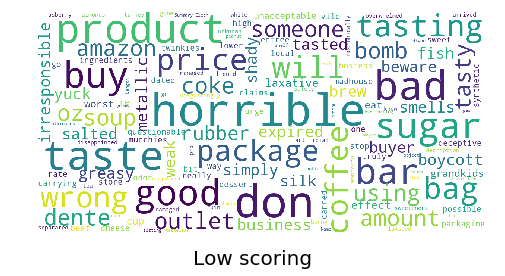

In [19]:
show_wordcloud(df[df.Prediction == 1]["Summary_Clean"], title = "Low scoring")

Above images shows the bad words captured from the review data column from the dataset. Summary of the reviews will be chosen to decide the low category food than the Text which is user comment about the food product

### Displaying reviews of words with high scoring

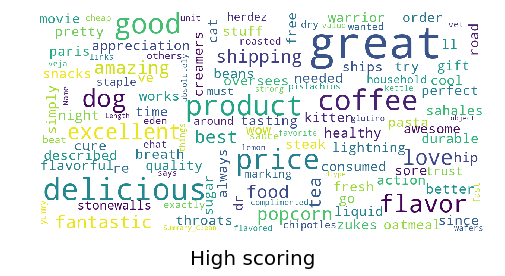

In [20]:
show_wordcloud(df[df.Prediction == 5]["Summary_Clean"], title = "High scoring")

### Applying Multinominal Naive Bayes Learning Method

Implementation of Multinominal Naive Bayes method to predict the positive and negative reviews and accuracy of the model using this algorithm.

In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

### Applying Bernoulli Naive Bayes Learning Method

Implementation of Bernoulli Naive Bayes method to predict the positive and negative reviews and accuracy of the model using this algorithm.

In [22]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

## Applying Logistic Regression Learning method

Implementation of logistic regression method to predict the positive and negative reviews and accuracy of the model using this algorithm.

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

### Logistic regression is the best algorithm implemented since its AUC curve value is the highest

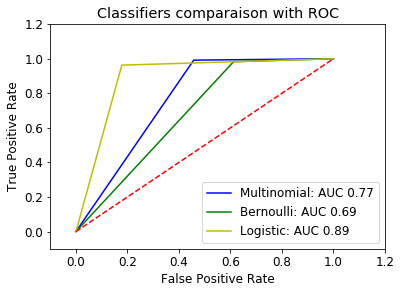

In [24]:
from sklearn.metrics import roc_curve, auc

def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Visualizing the acuracy ,recall and confusion matrix of the logistic regresion model

In [25]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.86      0.82      0.84     19935
   negative       0.95      0.96      0.96     71010

avg / total       0.93      0.93      0.93     90945



### Confusion matrix with Logistic Regression

How can you get the idea about the positive and Negative reviews? Is there any matrix to calculate that review?

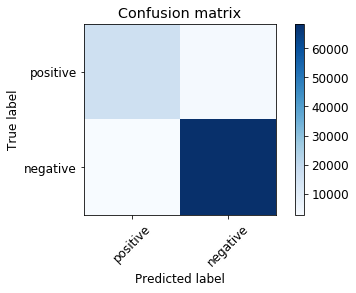

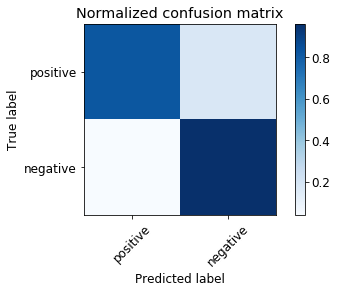

In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

# Looking at best words by the co-efficients

In [27]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logreg_result.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs.sort_values(by='coef')

,feature,coef
902026,worst,-27.192929
546975,not,-22.979784
766283,terrible,-20.125508
916987,yuck,-19.735845
56939,awful,-18.790482
391675,horrible,-18.179134
530140,nasty,-17.544776
207314,didn,-16.149930
875207,weak,-15.785580
624454,poor,-15.113796


From the above result, we can see that around 921995 words are deciding factor for positive and Negative reviews.

In [28]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The food was delicious, it smelled great and the taste was awesome")
test_sample(logreg, "The whole experience was horrible. The smell was so bad that it literally made me sick.")
test_sample(logreg, "The food was ok, I guess. The smell wasn't very good, but the taste was ok.")

Sample estimated as POSITIVE: negative prob 0.010804, positive prob 0.989196
Sample estimated as NEGATIVE: negative prob 0.999793, positive prob 0.000207
Sample estimated as NEGATIVE: negative prob 0.943927, positive prob 0.056073


Example of the POSITIVE and NEGATIVE result is shown above using the TEXT value of the dataset. negative probability for the first sentense is 0.01 and Positive probability is 0.98 which clearly shows that product review is positive and product is good. Same for the second example, positive prob is 0.002 and Negative prob is 0.999 which shows that second product is really bad and not suggested by any of the users.

In [29]:
test_sample(logreg, "The smell reminded me of ammonia")

Sample estimated as NEGATIVE: negative prob 0.928405, positive prob 0.071595


# for displaying USEFUL and USELESS words from reviews


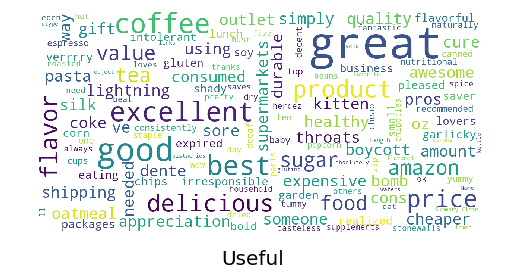

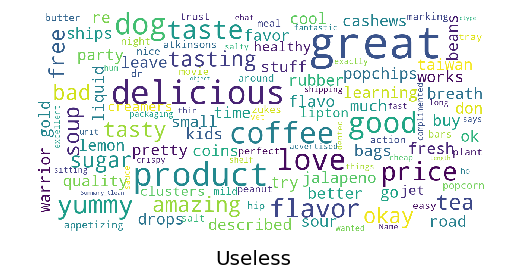

In [30]:
show_wordcloud(df[df.Usefulness == "useful"]["Summary_Clean"], title = "Useful")
show_wordcloud(df[df.Usefulness == "useless"]["Summary_Clean"], title = "Useless")

In [111]:
#remove punctuation
import unicodedata
import sys

df1 = df.iloc[:, [4,5,6,9]]
tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))
def remove_punctuation(text):
    return text.translate(tbl)

df1['Text']=df1['Text'].apply( lambda x: remove_punctuation(x))
df1["Text"].head(4)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0    I got them in a very timely manner and theyre ...
1    McCanns Steel Cut Oatmeal is the perfect break...
2    I would recommend it Quality pearls and a few ...
3    I have to admit I first purchased these Hazeln...
Name: Text, dtype: object

In [31]:
df_user = df.groupby(['UserId', 'ProfileName']).agg({'Prediction':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Score count', 'Score mean']
df_user = df_user.sort_values(by = 'Score count', ascending = False)
print(df_user.head(10))

                                                       Score count  Score mean
UserId         ProfileName                                                    
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                345    4.527536
A1YUL9PCJR3JTY O. Brown "Ms. O. Khannah-Brown"                 338    4.511834
AY12DBB0U420B  Gary Peterson                                   306    4.689542
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"          289    4.823529
A1Z54EM24Y40LL c2                                              207    4.381643
A1TMAVN4CEM8U8 Gunner                                          167    4.832335
A2MUGFV2TDQ47K Lynrie "Oh HELL no"                             166    3.722892
A3TVZM3ZIXG8YW christopher hayes                               161    1.000000
A3PJZ8TU8FDQ1K Jared Castle                                    151    4.556291
AZV26LP92E6WU  M. Hammond "ColemanFlGuy"                       140    4.864286


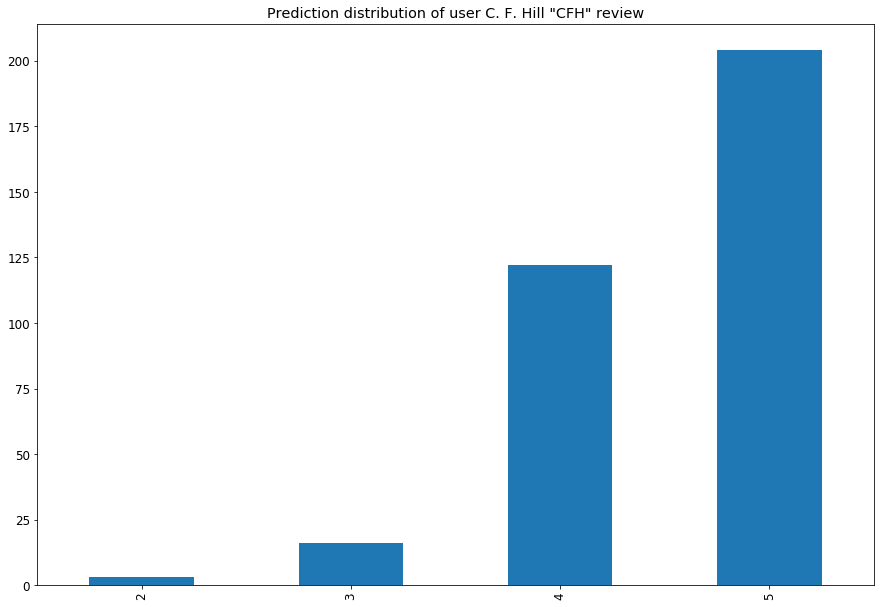

In [32]:
def plot_user(UserId):
    df_1user = df[df['UserId'] == UserId]['Prediction']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Prediction distribution of user {} review'.format(df[df['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_user('A3OXHLG6DIBRW8')
plt.show()

# Prediction of user A.bennett reviews

In [33]:
print(df_user[(df_user['Score mean']<3.5) & (df_user['Score mean']>2.5)].head())

                               Score count  Score mean
UserId         ProfileName                            
A35R32TA60XD57 M. Torma                112    3.348214
A2M9D9BDHONV3Y A. Bennett               95    3.210526
A2TN9C5E4A0I3F Jimmy                    84    2.690476
A2XNJJ9TF70P4J Angie                    72    2.875000
A2TO2BN3P4C00L Music Fan Jeff           58    3.431034


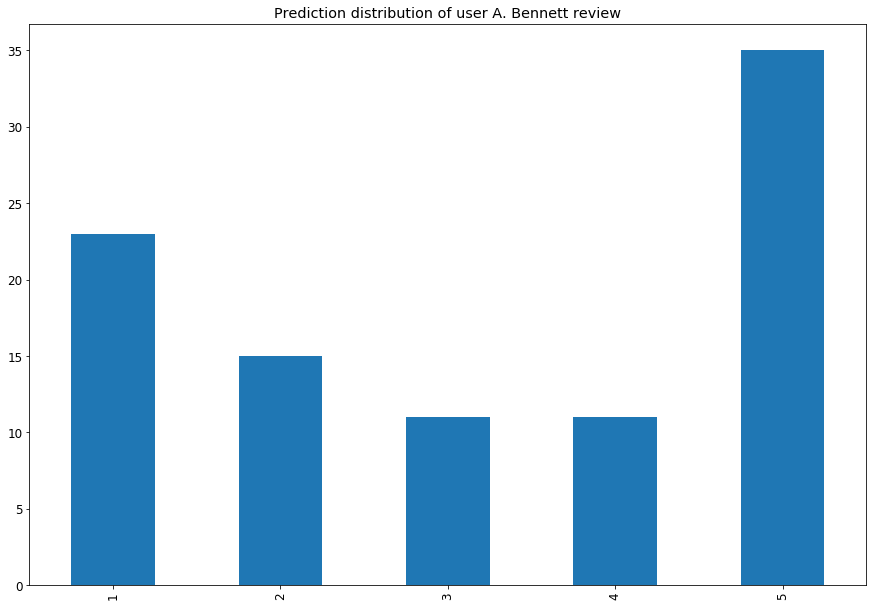

In [34]:
plot_user('A2M9D9BDHONV3Y')
plt.show()

The following code conducts basic sentiment analysis and finds the average sentiment PER WORD of each group of reviews. As expected, the higher the score given the more positive the review sentiment. Interestingly the sentiment seems to be stronger per word in the review title than in the text of the review itself. Presumably this is because the reviewer is trying to convay there happiness or displeasure as succinctly as possible.

In [35]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain

def get_token_ngram(Prediction, benchmark, userid='all'):

    if userid != 'all':
        odf = df[(df['UserId'] == userid) & (df['Prediction'] == Prediction)]['Text']
    else:
        odf = df[df['Prediction'] == Prediction]['Text']
        
    count = len(odf)
    total_text = ' '.join(odf)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A2M9D9BDHONV3Y')
    print('Prediction {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

Prediction 1 reviews most popular 2-gram / 3-gram:
   Count  Occur %                   Phrase
0   27.0  117.39%               (..., ...)
1   15.0   65.22%          (..., ..., ...)
2    8.0   34.78%  (monosodium, glutamate)
3    8.0   34.78%             (never, buy)
4    7.0   30.43%           (buy, product)
5    6.0   26.09%         (dry, tasteless)
6    6.0   26.09%            (decide, try)
7    6.0   26.09%    (never, buy, product)
Prediction 2 reviews most popular 2-gram / 3-gram:
    Count Occur %                Phrase
0     6.0   40.0%         (sauce, ruin)
1     6.0   40.0%  (sauce, ruin, whole)
2     6.0   40.0%         (ruin, whole)
3     5.0  33.33%            (n't, buy)
4     5.0  33.33%         (taste, like)
5     5.0  33.33%       (product, ever)
6     4.0  26.67%          (.give, try)
7     4.0  26.67%            (n't, get)
8     4.0  26.67%          (can, fruit)
9     4.0  26.67%    (.give, try, like)
10    4.0  26.67%     (..., .give, try)
11    4.0  26.67%     (n't, get

From the above result, we can see that for the prediction value : 1 occur of the words are too large and acc is mre thna 100% while for the prediction value : 2 there is slightly change in the occur of the words and accuracy is also decreased. Number of the users who have rated the products with prediction value of 3 are more than the users who have reviewed 1 or 2 grade out of 5 scale. Almost 55% users predict 4 scores for the food products on Amazon and words are all positive in the summary and text as well. 

In [36]:
# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    # easier benchmark since we have many different users here, thus different phrase
    d = get_token_ngram(j, 0.03)
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count Occur %           Phrase
0  4389.0  10.51%    (taste, like)
1  1855.0   4.44%   (waste, money)
2  1747.0   4.18%     (could, n't)
3  1707.0   4.09%      (n't, even)
4  1462.0    3.5%      (n't, know)
5  1437.0   3.44%     (would, n't)
6  1311.0   3.14%       (n't, buy)
7  1265.0   3.03%  (science, diet)
score 2 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  2545.0  10.67%   (taste, like)
1  1109.0   4.65%     (n't, like)
2  1070.0   4.49%    (would, n't)
3   875.0   3.67%  (think, would)
4   850.0   3.56%      (n't, buy)
5   822.0   3.45%     (n't, know)
6   807.0   3.38%    (n't, taste)
7   753.0   3.16%    (could, n't)
8   720.0   3.02%   (taste, good)
score 3 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  2569.0   7.53%   (taste, like)
1  1339.0   3.92%    (would, n't)
2  1267.0   3.71%     (n't, like)
3  1258.0   3.69%   (taste, good)
4  1150.0   3.37%     (n't, know)
5  

In [37]:
def get_token_adj(Prediction, benchmark, userid='all'):
    
    if userid != 'all':
        odf = df[(df['UserId'] == userid) & (df['Prediction'] == Prediction)]['Text']
    else:
        odf = df[df['Prediction'] == Prediction]['Text']
        
    count = len(odf)
    total_text = ' '.join(odf)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [38]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.25, 'A2M9D9BDHONV3Y')
    print('score {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular adjectives word:
    Count Occur %     Phrase
0    11.0  47.83%        dry
1    10.0  43.48%     cheese
2     8.0  34.78%     little
3     8.0  34.78%        bad
4     7.0  30.43%      tasty
5     7.0  30.43%  expensive
6     7.0  30.43%  delicious
7     6.0  26.09%       poor
8     6.0  26.09%       much
9     6.0  26.09%      bread
10    6.0  26.09%       hard
score 2 reviews most popular adjectives word:
   Count Occur %     Phrase
0    8.0  53.33%      whole
1    6.0   40.0%     cheese
2    5.0  33.33%  delicious
3    5.0  33.33%      awful
4    5.0  33.33%      wrong
5    4.0  26.67%      .give
6    4.0  26.67%      small
7    4.0  26.67%       good
8    4.0  26.67%       rich
score 3 reviews most popular adjectives word:
   Count Occur %        Phrase
0    6.0  54.55%         whole
1    4.0  36.36%          high
2    3.0  27.27%  disappointed
3    3.0  27.27%          fine
4    3.0  27.27%         black
5    3.0  27.27%     different
6    3.0  27.27% 

In [39]:
reviews = df[['Prediction','Summary']]

In [40]:
scores = reviews['Prediction']
reviews['Prediction'] = reviews['Prediction'].apply(lambda x : 'pos' if x > 3 else 'neg')

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
scores.mean()

4.183113675798233

In [42]:
reviews.groupby('Prediction')['Summary'].count()

Prediction
neg     99737
pos    354986
Name: Summary, dtype: int64

Count the number of the users who for the positive and negative reviews based on the prediction value greater than 3 out of 5 scale. 

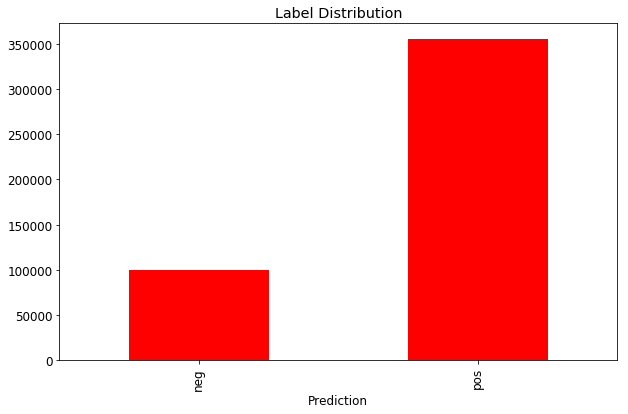

In [43]:
reviews.groupby('Prediction')['Summary'].count().plot(kind='bar',color=['r','g'],title='Label Distribution',figsize=(10,6))
plt.show()

In [44]:

print ('Percentage of negative reviews %.2f %%' % ((reviews.groupby('Prediction')['Summary'].count()['neg'])*100.0/len(reviews)))
print ('Percentage of positive reviews %.2f %%' % ((reviews.groupby('Prediction')['Summary'].count()['pos'])*100.0/len(reviews)))

Percentage of negative reviews 21.93 %
Percentage of positive reviews 78.07 %


We can see that almost 78 % reviews are positive for the amazon food products. Users who have rated less than 3 out of 5 star are only 22% which shows that Amazon food provides the good service and food and customers are happy with the services.

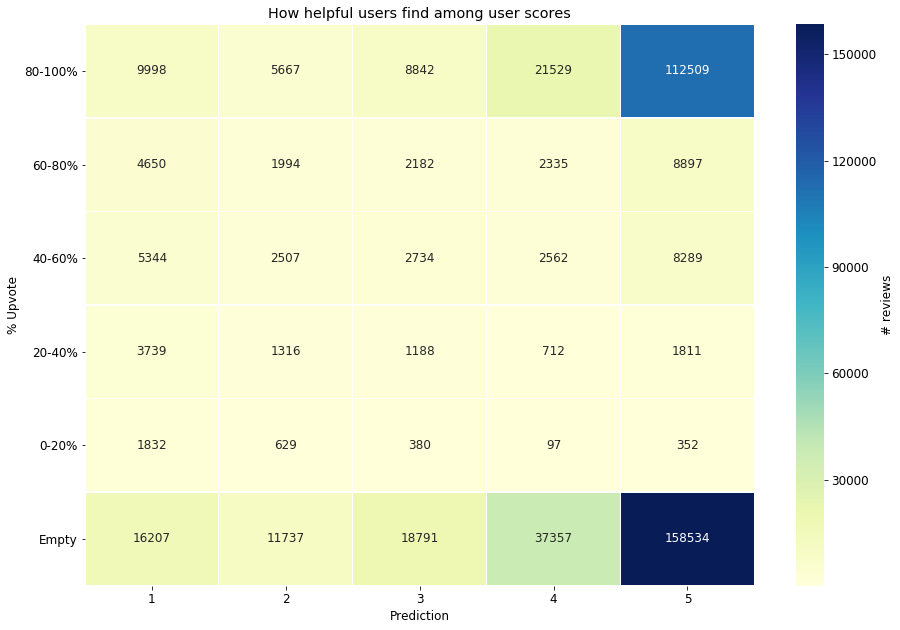

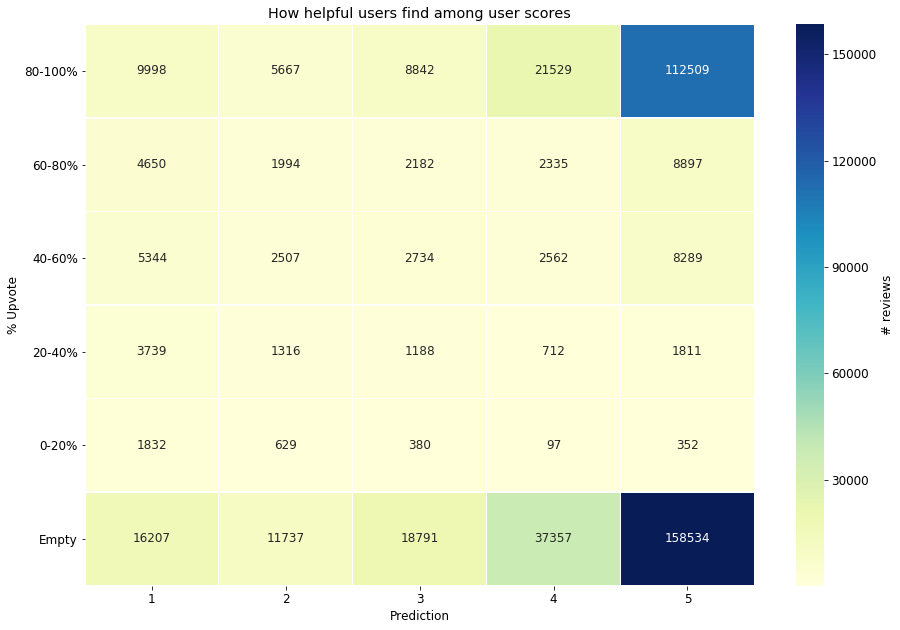

In [69]:
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)
df['% Upvote'] = pd.cut(df['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
df.head()

df_s = df.groupby(['Prediction', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')
plt.show()

In [45]:
def splitPosNeg(Summaries):
    neg = reviews.loc[Summaries['Prediction']=='neg']
    pos = reviews.loc[Summaries['Prediction']=='pos']
    return [pos,neg]

In [46]:
[pos,neg] = splitPosNeg(reviews)

In [47]:
#preprocessing steps

#stemmer = PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for t in line:
        #if(t not in stop):
            #stemmed = stemmer.stem(t)
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [48]:
pos_data = []
neg_data = []
for p in pos['Summary']:
    pos_data.append(preprocessing(p))

for n in neg['Summary']:
    neg_data.append(preprocessing(n))

In [49]:
data = pos_data + neg_data
labels = np.concatenate((pos['Prediction'].values,neg['Prediction'].values))

In [50]:

[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data,labels , test_size=0.25, random_state=20160121,stratify=labels)

In [51]:
## tokenizing the training data to find frequency of words
t = []
for line in Data_train:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [52]:

word_features = nltk.FreqDist(t)
print (len(word_features))

24646


In [53]:
vec_all = CountVectorizer()
ctr_features_all = vec_all.fit_transform(Data_train)

In [54]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(ctr_features_all)

In [55]:
cte_features_all = vec_all.transform(Data_test)
te_features_all = tf_vec_all.transform(cte_features_all)

# Implement SVD 

In [56]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200)
tr_features_truncated = svd.fit_transform(tr_features_all)

In [57]:
te_features_truncated = svd.transform(te_features_all)

In [58]:
svd = TruncatedSVD(n_components=200)
ctr_features_truncated = svd.fit_transform(ctr_features_all)
cte_features_truncated = svd.transform(cte_features_all)

# Comparison of the Diff Classifiers

In [143]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

models = {'BernoulliNB': BernoulliNB(binarize=0.5)
          ,'Logistic' : linear_model.LogisticRegression(C=1e5),'Decision Tree' : DecisionTreeClassifier(random_state=20160121, criterion='entropy'),
                                                                                                        'Perceptron': linear_model.Perceptron(n_iter=1000)}

In [144]:
results_svd = pd.DataFrame()

foldnum = 0
tfprediction = {}
cprediction = {}
for name,model in models.items():
        model.fit(tr_features_truncated, Train_labels)
        tfprediction[name] = model.predict(te_features_truncated)
        tfaccuracy = metrics.accuracy_score(tfprediction[name],Test_labels)
        
        #model.fit(ctr_features_truncated,Train_labels)
        #cprediction[name] = model.predict(cte_features_truncated)
        #caccuracy = metrics.accuracy_score(cprediction[name],Test_labels)

        results_svd.loc[foldnum,'Model']=name
        results_svd.loc[foldnum,'TF-IDF Accuracy']=tfaccuracy
        #results_svd.loc[foldnum,'Count Accuracy']=caccuracy
        foldnum = foldnum+1
print (results_svd)

           Model  TF-IDF Accuracy
0    BernoulliNB         0.792402
1       Logistic         0.844697
2  Decision Tree         0.862501
3     Perceptron         0.822134


It is clear that for the data model of Amazon food reviews, Decision tree classifier is the best as the accuracy provided by the Decision tree classifier is almost 86% which is best out of all the 4 classiefier that we have implemented. After that, Logistic regression classifier has accuracy of 84.4% which is slightly less than the Decision tree but better than the other 2 classifiers. Same like the logistic regression, Perceptron has almost 82.2% accuracy which is good for the model. We can notice that BernoulliNB has accuracy of 79 which is lower than all other classifier that we have implemented for the Amazon food review model.

In [145]:
for name,model in models.items():
    print ("Classification report for ",name)
    print(metrics.classification_report(Test_labels, tfprediction[name]))
    print("\n")

Classification report for  BernoulliNB
             precision    recall  f1-score   support

        neg       0.91      0.06      0.11     24934
        pos       0.79      1.00      0.88     88747

avg / total       0.82      0.79      0.71    113681



Classification report for  Logistic
             precision    recall  f1-score   support

        neg       0.76      0.43      0.55     24934
        pos       0.86      0.96      0.91     88747

avg / total       0.84      0.84      0.83    113681



Classification report for  Decision Tree
             precision    recall  f1-score   support

        neg       0.69      0.69      0.69     24934
        pos       0.91      0.91      0.91     88747

avg / total       0.86      0.86      0.86    113681



Classification report for  Perceptron
             precision    recall  f1-score   support

        neg       0.82      0.24      0.38     24934
        pos       0.82      0.98      0.90     88747

avg / total       0.82      0.82  

# Random Forest Classifier

In [106]:
### Cleaning data to remove Stopwords and Small length words also lemmatized data to bring into common format

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import re

lmtzr = WordNetLemmatizer()
negation = re.compile(r"(?:^(?:never|no|nothing|nowhere|noone|none|not|havent|hasnt|hadnt|cant|couldnt|shouldnt|wont|wouldnt|dont|doesnt|didnt|isnt|arent|aint)$)|n't",re.I)
clp = re.compile(r"^[.:;!?]$",re.I)
    
def extract_words_from_comments(df):
    comments_tok = []
    for index, datapoint in df.iterrows():
        tokenized_words = word_tokenize(datapoint["Text"].lower(),language='english')
        pos_tagged_words = pos_tag(tokenized_words)
        tokenized_words = ["_".join([lmtzr.lemmatize(i[0]),i[1]]) for i in pos_tagged_words if (i[0] not in stopwords.words("english") and len(i[0]) > 2)]
        comments_tok.append(tokenized_words)
    df["comment_tok"] = comments_tok
    return df

df = extract_words_from_comments(df)
print (df.head())
print (df.shape)

       Id   ProductId          UserId                ProfileName  \
0  492346  B001VNP0Y6   AEZRVY3CV52UZ  Corey Wright "Democratus"   
1  343811  B008J1HO4C  A18VZYSLOUO060    D. Simpson "Frugal SOB"   
2  347257  B000FFIL60  A28Y1M7GRG0I9M        Real Comments "Lin"   
3  225529  B002ZX1U9A  A245HC4T5J97WG            Logan DeAngelis   
4  485488  B001RVFERK   AVABPJCKE2MR5                       spal   

   HelpfulnessNumerator  HelpfulnessDenominator  Prediction        Time  \
0                     3                       3           5  1320537600   
1                     2                       2           5  1204329600   
2                     0                       0           4  1318464000   
3                     0                       0           5  1306540800   
4                     0                       0           4  1314921600   

                         Summary  \
0             Just what I needed   
1         Most excellent oatmeal   
2                    Quality Tea

# Vectorize words using BOW technique

In [107]:
from gensim import matutils,corpora, models

def vectorize_comments(df):
    d = corpora.Dictionary(df["comment_tok"])
    d.filter_extremes(no_below=2, no_above=0.8)
    d.compactify()
    corpus = [d.doc2bow(text) for text in df["comment_tok"]]
    # tfidf = TfidfModel(corpus=corpus,id2word=d)
    # corpus_tfidf = tfidf[corpus]
    # corpus_tfidf = matutils.corpus2csc(corpus_tfidf,num_terms=len(d.token2id))
    corpus = matutils.corpus2csc(corpus, num_terms=len(d.token2id))
    corpus = corpus.transpose()
    return d, corpus

dictionary,corpus = vectorize_comments(df)
print (corpus.shape)

(50, 195)


# Train Random forest classifier

In [110]:
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle

def train_classifier(X,y):
    n_estimators = [100]
    min_samples_split = [2]
    min_samples_leaf = [1]
    bootstrap = [True]

    parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf,
                  'min_samples_split': min_samples_split}

    clf = GridSearchCV(RFC(verbose=1,n_jobs=4), cv=4, param_grid=parameters)
    clf.fit(X, y)
    return clf

X_train, X_test, y_train, y_test = cross_validation.train_test_split(corpus, df["Prediction"], test_size=0.02, random_state=17)
classifier = train_classifier(X_train,y_train)
print (classifier.best_score_, "----------------Accuracy score on Cross Validation Sets")
print (classifier.score(X_test,y_test))

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=4.
  % (min_labels, self.n_folds)), Warning)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parall

0.5510204081632653 ----------------Accuracy score on Cross Validation Sets
1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


# Improving Prediction with K-Means Clustering of Reviews

In [112]:
#Apply TfidfVectorizer to review text

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics


In [113]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,random_state=5)

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df1['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [114]:
X_train = vectorizer.transform(df1['Text'])
vocab = vectorizer.get_feature_names()
sse_err = []
res = model.fit(X_train)
vocab = np.array(vocab)
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
words=list(words)

In [115]:
#top 10 words for each cluster
words

['better',
 'buy',
 'ive',
 'thank',
 'little',
 'old',
 'ones',
 'highly',
 'taste',
 'prefer',
 'make',
 'product',
 'flavor',
 'good',
 'tea',
 'sugar',
 'tastes',
 'just',
 'recommended',
 'tasty',
 'quality',
 'food',
 'br',
 'amazon',
 'bags',
 'months',
 'isnt',
 '12',
 'great',
 'br br',
 'having',
 'doesnt',
 'using',
 'time',
 'like',
 'price',
 'try',
 'trying']

In [116]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [117]:
# how many observations are in each cluster
df1['cluster'] = model.labels_
df1.groupby('cluster').count()

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Text
cluster,,,,
0,14,14,14,14
1,12,12,12,12
2,15,15,15,15
3,9,9,9,9


In [118]:
# what does each cluster look like
df1.groupby('cluster').mean()

,HelpfulnessNumerator,HelpfulnessDenominator,Prediction
cluster,,,
0,2.357143,3.857143,3.642857
1,1.666667,2.333333,4.083333
2,1.400000,1.466667,4.066667
3,3.777778,5.222222,3.777778


# Improving Prediction with Logistic Regression of Reviews

In [132]:
stops = set(stopwords.words("english"))

def binarize_prediction(prediction):
    """
    set prediction of 1-3 to 0 and 4-5 as 1
    """
    
    if prediction <3:
        return 0
    else:
        return 1



def review_to_words( review ):
    """
    Return a list of cleaned word tokens from the raw review
    
    """
        
    #Remove any HTML tags and convert to lower case
    review_text = BeautifulSoup(review).get_text().lower() 
    
    #Replace smiliey and frown faces, ! and ? with coded word SM{int} in case these are valuable
    review_text=re.sub("(:\))",r' SM1',review_text)
    review_text=re.sub("(:\()",r' SM2',review_text)
    review_text=re.sub("(!)",r' SM3',review_text)
    review_text=re.sub("(\?)",r' SM4',review_text)
    
    #keep 'not' and the next word as negation may be important
    review_text=re.sub(r"not\s\b(.*?)\b", r"not_\1", review_text)
    
    #keep letters and the coded words above, replace the rest with whitespace
    nonnumbers_only=re.sub("[^a-zA-Z\_(SM\d)]"," ",review_text)  
    
    #Split into individual words on whitespace
    words = nonnumbers_only.split()                             
    
    #Remove stop words
    words = [w for w in words if not w in stops]   
    
    return (words)



def avg_word_vectors(wordlist,size):
    """
    returns a vector of zero for reviews containing words where none of them
    met the min_count or were not seen in the training set
    
    Otherwise return an average of the embeddings vectors
    
    """
    
    sumvec=np.zeros(shape=(1,size))
    wordcnt=0
    
    for w in wordlist:
        if w in model:
            sumvec += model[w]
            wordcnt +=1
    
    if wordcnt ==0:
        return sumvec
    
    else:
        return sumvec / wordcnt

In [172]:
from bs4 import BeautifulSoup

df['Prediction_binary']=df['Prediction'].apply(binarize_prediction)
df['word_list']=df['Summary'].apply(review_to_words)

print (df.head(n=10))

       Id   ProductId          UserId                ProfileName  \
0  492346  B001VNP0Y6   AEZRVY3CV52UZ  Corey Wright "Democratus"   
1  343811  B008J1HO4C  A18VZYSLOUO060    D. Simpson "Frugal SOB"   
2  347257  B000FFIL60  A28Y1M7GRG0I9M        Real Comments "Lin"   
3  225529  B002ZX1U9A  A245HC4T5J97WG            Logan DeAngelis   
4  485488  B001RVFERK   AVABPJCKE2MR5                       spal   
5   74981  B0026RQTGE  A161Y9NAR43WCW                     vertov   
6  204180  B000F0FZE6  A1H35JZ9UUCVIF                   carrera4   
7  454372  B0019K981W  A13H71301WENPW     Patricia Fentriss "PF"   
8  112235  B0009JJB4S  A2HBOYLMGW2A5Y                        lee   
9  295251  B000LQNK50   ATO0RF3HWQ3WW            Scott "Scottso"   

   HelpfulnessNumerator  HelpfulnessDenominator  Prediction        Time  \
0                     3                       3           5  1320537600   
1                     2                       2           5  1204329600   
2                     0   

/Users/user/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/user/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [178]:
from gensim.models import Word2Vec

X_train, X_test, y_train, y_test = train_test_split(df['word_list'], df['Prediction_binary'], test_size=0.1, random_state=42)


#size of hidden layer (length of continuous word representation)
dimsize=400

#train word2vec on 80% of training data
model = Word2Vec(X_train.values, size=dimsize, window=5, min_count=5, workers=4)

#create average vector for train and test from model
#returned list of numpy arrays are then stacked 
X_train=np.concatenate([avg_word_vectors(w,dimsize) for w in X_train])
X_test=np.concatenate([avg_word_vectors(w,dimsize) for w in X_test])

In [180]:
#basic logistic regression with SGD
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

clf = linear_model.SGDClassifier(loss='log')
clf.fit(X_train, y_train)
p=clf.predict_proba(X_test)
roc_auc_score(y_test,p[:,1])

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.83333333333333326

### Accuracy which we get here is 83% using the logistic regression which was previously less than this using other classifiers

In [219]:
# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# kNN cross validation

# print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using kNN is 0.6


#### KNN score is only 0.6 which is 60% accuracy. That means out model is best with the Logistic regression and works good with it.  

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
# min_df=5, discard words appearing in less than 5 documents
# max_df=0.8, discard words appering in more than 80% of the documents
# sublinear_tf=True, use sublinear weighting
# use_idf=True, enable IDF
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True)

train_vectors = vectorizer.fit_transform(df["Text"])
feature_names = vectorizer.get_feature_names()

In [220]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab[1:200])

['all', 'also', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'bought', 'box', 'br', 'but', 'buy', 'can', 'ever', 'flavor', 'for', 'from', 'get', 'good', 'great', 'had', 'has', 'have', 'healthy', 'high', 'highly', 'if', 'in', 'is', 'it', 'just', 'like', 'little', 'love', 'make', 'me', 'more', 'much', 'my', 'not', 'of', 'on', 'one', 'or', 'other', 'out', 'product', 'recommend', 'since', 'so', 'sugar', 'taste', 'tastes', 'than', 'that', 'the', 'them', 'there', 'these', 'they', 'this', 'to', 'too', 'try', 'used', 've', 'very', 'was', 'way', 'were', 'when', 'which', 'will', 'with', 'worth', 'you', 'your']


In [225]:
from sklearn.metrics import accuracy_score

print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_vectors, df["Summary"] )

# prediction_rbf = classifier_rbf.predict(test_vectors)

Training the random forest...


In [205]:
def sampling_dataset(df):
    count = 5000
    class_df_sampled = pd.DataFrame(columns = ["Prediction","Text", "Summary"])
    temp = []
    for c in df.Prediction.unique():
        class_indexes = df[df.Prediction == c].index
        random_indexes = np.random.choice(class_indexes, count, replace=True)
        temp.append(df.loc[random_indexes])
        
    for each_df in temp:
        class_df_sampled = pd.concat([class_df_sampled,each_df],axis=0)
    
    return class_df_sampled

df_Sample = sampling_dataset(df.loc[:,["Prediction","Text","Summary"]])
df_Sample.reset_index(drop=True,inplace=True)
print (df_Sample.head())
print (df_Sample.shape)


  Prediction                                               Text  \
0          5  It's so much fun to make my own soda with as m...   
1          5  No doggie breath for our dog.  People are alwa...   
2          5  This ghee is delicious. A little goes a long w...   
3          5  I was very happy with my order.  It arrived on...   
4          5  If you are trying to watch calories, these are...   

                      Summary  
0               Just Amazing!  
1    Our dog has fresh breath  
2                  Delicious!  
3  On time and as described!!  
4         good tasting flavor  
(25000, 3)


In [200]:
df_TestSample = sampling_dataset(df.loc[:,["Prediction","Text","Summary"]])
df_TestSample.reset_index(drop=True,inplace=True)

print (df_TestSample.head())
print (df_TestSample.shape)

  Prediction                                               Text  \
0          5  It's so much fun to make my own soda with as m...   
1          5  I have to admit, I first purchased these Hazel...   
2          5  I sent this to my mother as a thank you for al...   
3          5  I got them in a very timely manner and they're...   
4          5  This ghee is delicious. A little goes a long w...   

                         Summary  
0                  Just Amazing!  
1  Great Coffee at a Great price  
2       Great Appreciation Gift!  
3             Just what I needed  
4                     Delicious!  
(25000, 3)


In [201]:
test_vectors = vectorizer.transform(df_TestSample["Summary"])
prediction_rbf = forest.predict(test_vectors)

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Classifiers = [
#     LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
#     RandomForestClassifier(n_estimators=200),
#     AdaBoostClassifier(),
    GaussianNB()
]

In [227]:
dense_features=train_vectors.toarray()
dense_test= test_vectors.toarray()

Accuracy=[]
Model=[]
for classifier in Classifiers:
    print('training '+classifier.__class__.__name__)
    try:
        fit = classifier.fit(train_vectors,df_Sample["Text"])
        pred = fit.predict(test_vectors)
    except Exception:
        fit = classifier.fit(dense_features,df_Sample["Text"])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,df_TestSample["Text"])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

training LogisticRegression


ValueError: Found input variables with inconsistent numbers of samples: [50, 25000]